# **Primera Actividad**

Andrea Mirelle Peralta Ogaz

##### **Importando las Librerías**

In [162]:
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### **1. Obtener el token del INEGI.**

**Token de Acceso** 9eb8deff-d97e-4695-90f8-e2f3ab8c9236
    
**Código del Estado de Chihuahua** 08


### **2. Hacer la llamada a la API**

In [171]:

# URL de la solicitud
url = 'https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/08/00/400/9eb8deff-d97e-4695-90f8-e2f3ab8c9236'

# Solicitud GET a la API
response = requests.get(url)

if response.status_code == 200:
    content= json.loads(response.content)

# content

### **3. Transformar la respuesta de la API en un dataframe**

In [172]:
df_cuu = pd.DataFrame(content)
df_cuu.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,08037713943004851000001033S5,9020534,ALCATRAZ GYM,,Centros de acondicionamiento físico del sector...,0 a 5 personas,AVENIDA,TECNOLÓGICO,169,2,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.42433510,31.70306022,,,
1,08019522460000612000037857S9,9047235,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,AVENIDA,IGNACIO VALLARTA,5709,6,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",,,WWW.SECURITYFINANCE.COM,Fijo,-106.10077538,28.67275577,,,
2,08019522460000602000037857S0,9047233,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,CALLE,JUAN ALDAMA,93100,,...,"CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA",,,WWW.SECURITYFINANCE.COM,Fijo,-106.86446449,28.40425242,,,
3,08037522460000352000037857S4,9047138,SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,BOULEVARD,MANUEL GOMEZ MORIN,8704,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,WWW.SECURITYFINANCE.COM.MX,Fijo,-106.40144310,31.70292415,,,
4,08019237212000353000000000U1,6143166,"""",CONSTRUCTORA PEWIS SA DE CV,Construcción de obras de urbanización,11 a 30 personas,CALLE,5 DE MAYO,2116,,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",,,,Fijo,-106.00880487,28.59832225,,,


### **4. Separar la columna ubicación en 3 columnas (Localidad, Municipio, Estado)**

In [173]:
# Separar la columna 'ubicacion'
df_cuu[["Localidad", "Municipio", "Estado"]] = df_cuu["Ubicacion"].str.split(", ", expand=True)
df_cuu.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,Localidad,Municipio,Estado
0,08037713943004851000001033S5,9020534,ALCATRAZ GYM,,Centros de acondicionamiento físico del sector...,0 a 5 personas,AVENIDA,TECNOLÓGICO,169,2,...,,Fijo,-106.42433510,31.70306022,,,,JUÁREZ,Juárez,CHIHUAHUA
1,08019522460000612000037857S9,9047235,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,AVENIDA,IGNACIO VALLARTA,5709,6,...,WWW.SECURITYFINANCE.COM,Fijo,-106.10077538,28.67275577,,,,CHIHUAHUA,Chihuahua,CHIHUAHUA
2,08019522460000602000037857S0,9047233,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,CALLE,JUAN ALDAMA,93100,,...,WWW.SECURITYFINANCE.COM,Fijo,-106.86446449,28.40425242,,,,CUAUHTÉMOC,Cuauhtémoc,CHIHUAHUA
3,08037522460000352000037857S4,9047138,SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,BOULEVARD,MANUEL GOMEZ MORIN,8704,,...,WWW.SECURITYFINANCE.COM.MX,Fijo,-106.40144310,31.70292415,,,,JUÁREZ,Juárez,CHIHUAHUA
4,08019237212000353000000000U1,6143166,"""",CONSTRUCTORA PEWIS SA DE CV,Construcción de obras de urbanización,11 a 30 personas,CALLE,5 DE MAYO,2116,,...,,Fijo,-106.00880487,28.59832225,,,,CHIHUAHUA,Chihuahua,CHIHUAHUA


### **5. Hacer una grafica Top 10 con establecimientos por clase de actividad economica**

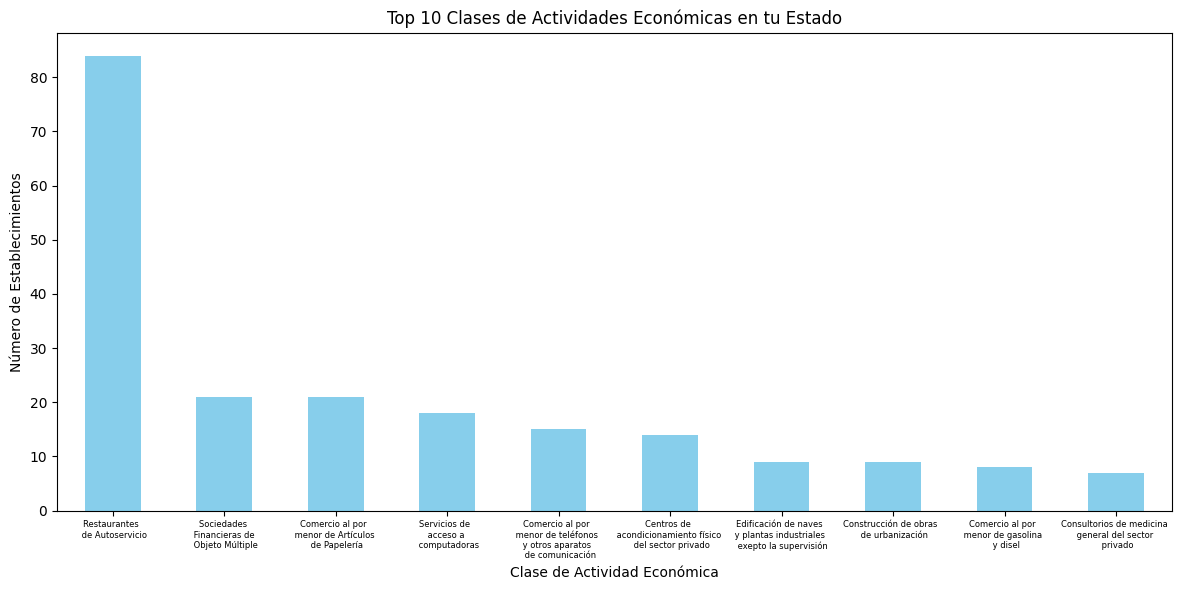

In [174]:
# Obtener el top 10 de Clases de actividades económicas
top_10_actividades = df_cuu["Clase_actividad"].value_counts().head(10)

# Etiquetas personalizadas para los ticks del eje x
etiquetas_personalizadas = ['Restaurantes \n de Autoservicio', 'Sociedades \n Financieras de \n Objeto Múltiple', 'Comercio al por  \n menor de Artículos  \n de Papelería', 'Servicios de  \n acceso a  \n computadoras', 'Comercio al por  \n menor de teléfonos  \n y otros aparatos  \n de comunicación', 'Centros de  \n acondicionamiento físico  \n del sector privado', 'Edificación de naves  \n y plantas industriales  \n exepto la supervisión', 'Construcción de obras  \n de urbanización', 'Comercio al por  \n menor de gasolina  \n y disel', 'Consultorios de medicina \n general del sector  \n privado']

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
top_10_actividades.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clases de Actividades Económicas en tu Estado')
plt.xlabel('Clase de Actividad Económica')
plt.ylabel('Número de Establecimientos')
plt.xticks(rotation=0, fontsize=6)  
plt.xticks(range(10), etiquetas_personalizadas) 
plt.tight_layout()
plt.show()


# **Segunda Actividad**

Andrea Mirelle Peralta Ogaz

In [143]:
#Datos CUU
df_cuu = pd.DataFrame(content)
df_cuu.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,08037713943004851000001033S5,9020534,ALCATRAZ GYM,,Centros de acondicionamiento físico del sector...,0 a 5 personas,AVENIDA,TECNOLÓGICO,169,2,...,"JUÁREZ, Juárez, CHIHUAHUA",,,,Fijo,-106.42433510,31.70306022,,,
1,08019522460000612000037857S9,9047235,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,AVENIDA,IGNACIO VALLARTA,5709,6,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",,,WWW.SECURITYFINANCE.COM,Fijo,-106.10077538,28.67275577,,,
2,08019522460000602000037857S0,9047233,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,CALLE,JUAN ALDAMA,93100,,...,"CUAUHTÉMOC, Cuauhtémoc, CHIHUAHUA",,,WWW.SECURITYFINANCE.COM,Fijo,-106.86446449,28.40425242,,,
3,08037522460000352000037857S4,9047138,SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,BOULEVARD,MANUEL GOMEZ MORIN,8704,,...,"JUÁREZ, Juárez, CHIHUAHUA",,,WWW.SECURITYFINANCE.COM.MX,Fijo,-106.40144310,31.70292415,,,
4,08019236111000443011000000U5,6143176,"""",HERGO PROYECTO CONSTRUCCION Y CONSULTORIA SA D...,"Edificación de naves y plantas industriales, e...",0 a 5 personas,,SOR JUANA INÉS DE LA CRUZ,2705,0,...,"CHIHUAHUA, Chihuahua, CHIHUAHUA",,,,Fijo,-106.07975105,28.65210840,,,


In [175]:
# URL de la solicitud para datos de Jalisco (14)
url = 'https://www.inegi.org.mx/app/api/denue/v1/consulta/BuscarEntidad/todos/14/00/400/9eb8deff-d97e-4695-90f8-e2f3ab8c9236'

# Solicitud GET a la API
response = requests.get(url)

if response.status_code == 200:
    content_2= json.loads(response.content)

# content_2

In [176]:
df_jal = pd.DataFrame(content_2)
df_jal.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Ubicacion,Telefono,Correo_e,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local
0,14097522320000211000037667S4,1754430,CAJA POPULAR OBLATOS SUC TULIPANES,CAJA POPULAR OBLATOS SC DE AP DE RL DE CV,Cajas de ahorro popular,0 a 5 personas,CALLE,Rosal,1221,0,...,"LA TIJERA, Tlajomulco de Zúñiga, JALISCO",,,,Fijo,-103.43246323,20.58529840,,,
1,14039467111011864012000000U9,6341836,PROSIL SA DE CV,PRO SIL SA DE CV,Comercio al por mayor de partes y refacciones ...,31 a 50 personas,CALLE,4,2220,0,...,"GUADALAJARA, Guadalajara, JALISCO",,CCHAVEZ@PROSIL.COM.MX,,Fijo,-103.36520638,20.64834802,,,
2,14039532299000471010000000U0,1677715,- RENTA DE BRINCOLINES Y MOVILIARIO- VERONICA ...,,Centros generales de alquiler,0 a 5 personas,CALLE,MESA CENTRAL,323,,...,"GUADALAJARA, Guadalajara, JALISCO",,,,Fijo,-103.31991159,20.70453887,,,
3,14039463310017731011009581S6,6226733,TLAQUEPAQUE,TYPHOON SPORT COALITION SAPI DE CV,Comercio al por menor de artículos y aparatos ...,11 a 30 personas,CALLE,RÍO MEZCALA,0,0,...,"GUADALAJARA, Guadalajara, JALISCO",,FERNANDO.GONZALEZ@TAVISTOCK.MX,,Fijo,-103.33011387,20.65279572,,,
4,14120237111000225000000000U3,6146398,"""",GRUPO CONSTRUCTOR FELCA SA DE CV,"Construcción de carreteras, puentes y similares",11 a 30 personas,CALLE,FRANCISCO VILLA,49,,...,"ZAPOPAN, Zapopan, JALISCO",,GFELCA@YAHOO.COM.MX,,Fijo,-103.43048444,20.61139496,,,


### **4. Unir los dataframes usando la funcion concat**

In [177]:
# Unir los DataFrames usando concat
df_comparativo = pd.concat([df_cuu, df_jal])

### **5. Separar la columna ubicacion en 3 columnas (Localidad, Municipio, Estado)**

In [178]:
# Separar la columna 'ubicacion'
df_comparativo[["Localidad", "Municipio", "Estado"]] = df_comparativo["Ubicacion"].str.split(", ", expand=True)
df_comparativo.head()

,CLEE,Id,Nombre,Razon_social,Clase_actividad,Estrato,Tipo_vialidad,Calle,Num_Exterior,Num_Interior,...,Sitio_internet,Tipo,Longitud,Latitud,tipo_corredor_industrial,nom_corredor_industrial,numero_local,Localidad,Municipio,Estado
0,08037713943004851000001033S5,9020534,ALCATRAZ GYM,,Centros de acondicionamiento físico del sector...,0 a 5 personas,AVENIDA,TECNOLÓGICO,169,2,...,,Fijo,-106.42433510,31.70306022,,,,JUÁREZ,Juárez,CHIHUAHUA
1,08019522460000612000037857S9,9047235,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 1,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,AVENIDA,IGNACIO VALLARTA,5709,6,...,WWW.SECURITYFINANCE.COM,Fijo,-106.10077538,28.67275577,,,,CHIHUAHUA,Chihuahua,CHIHUAHUA
2,08019522460000602000037857S0,9047233,SECURITY FINANCE CASA DE PRESTAMOS CHIHUAHUA 2,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,CALLE,JUAN ALDAMA,93100,,...,WWW.SECURITYFINANCE.COM,Fijo,-106.86446449,28.40425242,,,,CUAUHTÉMOC,Cuauhtémoc,CHIHUAHUA
3,08037522460000352000037857S4,9047138,SECURITY FINANCE CASA DE PRESTAMOS JUAREZ 3,CASA DE AMIGOS DE MEXICO S DE RL DE CV,Sociedades financieras de objeto múltiple,0 a 5 personas,BOULEVARD,MANUEL GOMEZ MORIN,8704,,...,WWW.SECURITYFINANCE.COM.MX,Fijo,-106.40144310,31.70292415,,,,JUÁREZ,Juárez,CHIHUAHUA
4,08019237212000353000000000U1,6143166,"""",CONSTRUCTORA PEWIS SA DE CV,Construcción de obras de urbanización,11 a 30 personas,CALLE,5 DE MAYO,2116,,...,,Fijo,-106.00880487,28.59832225,,,,CHIHUAHUA,Chihuahua,CHIHUAHUA


### **6. Hacer la comparacion sobre la clase de actividad económica entre los dos estados**

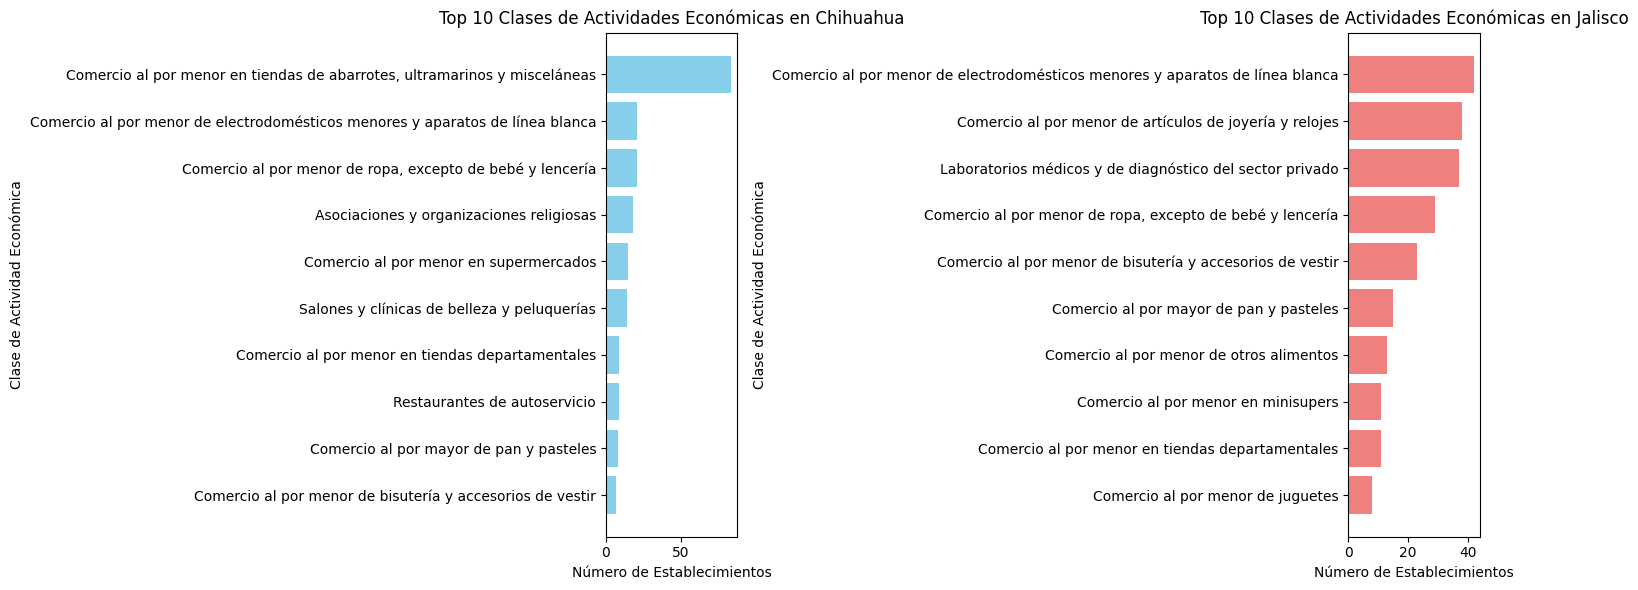

In [179]:
# Obtener el top 10 de Clases de actividades económicas para Chihuahua
top_10_cuu = df_cuu['Clase_actividad'].value_counts().head(10)

# Obtener el top 10 de Clases de actividades económicas para Jalisco
top_10_jal = df_jal['Clase_actividad'].value_counts().head(10)

# Crear una figura de dos subplots (una para Chihuahua y otra para Jalisco)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot para Chihuahua
axes[0].barh(top_10_cuu.index, top_10_cuu.values, color='skyblue')
axes[0].set_title('Top 10 Clases de Actividades Económicas en Chihuahua')
axes[0].set_xlabel('Número de Establecimientos')
axes[0].set_ylabel('Clase de Actividad Económica')
axes[0].invert_yaxis()  # Invertir el eje y para mostrar la clase con más establecimientos arriba

# Subplot para Jalisco
axes[1].barh(top_10_jal.index, top_10_jal.values, color='lightcoral')
axes[1].set_title('Top 10 Clases de Actividades Económicas en Jalisco')
axes[1].set_xlabel('Número de Establecimientos')
axes[1].set_ylabel('Clase de Actividad Económica')
axes[1].invert_yaxis()  # Invertir el eje y para mostrar la clase con más establecimientos arriba

# Ajustar espaciado entre subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()
